## Preprocessing of Stroke Data

Prior to model building, we need to do some preprocessing of the stroke data. This will include:
- Handle any missing values w/ appropriate imputation methods
- Standardization/normalization of variables 
- Variable encoding
- Address outliers

The final product of this will be an exported CSV of the preprocessed data. We will be able to maintain both sets of data - raw and preprocessed.

### Code

In [86]:
# Import libraries we'll need later
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

In [87]:
# Load in data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [89]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [90]:
# Change name of Residence_type column to residence_type for uniformity
df.rename(columns={'Residence_type': 'residence_type'}, inplace=True)

In [91]:
# Check to make sure column name change was successful
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [92]:
# Check for any missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

bmi    201
dtype: int64


It appears that `bmi` is the only column with missing values. 201 entries are missing BMI data, which makes up only 3.93% of all entries. Since this is such a small portion of the dataset we need to generate data for, we can probably get away with just using the average BMI value to fill these in. However, a KNN imputation method will probably be more accurate since it can use all the information for each entry to generate a BMI value for. Before filling in these missing values, let's check the distribution and descriptive statistics to make sure our changes will not have too much influence. 

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64


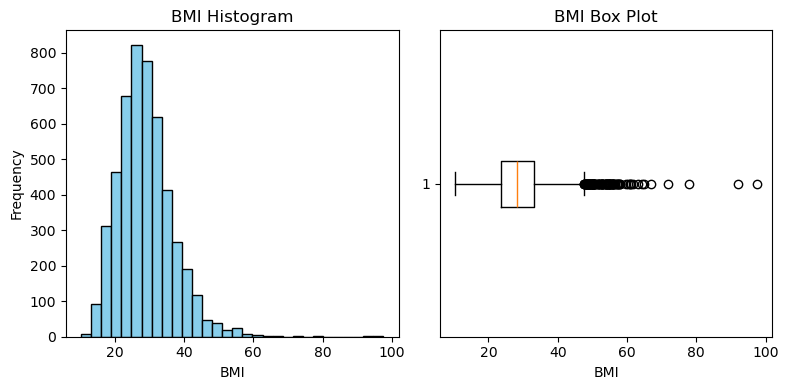

In [94]:
# Get descriptive stats
print(df['bmi'].describe())

# Side by side histogram and box plot
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(df['bmi'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.boxplot(df['bmi'].dropna(), vert=False)
plt.title('BMI Box Plot')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

The distribution of `bmi` data appears to be pretty normal and centered around a mean of 28.10. Also, definitely a good bit of outlier data, as evidence in the box plot. We'll need to address those later. Let's use KNN to fill in the missing values and hope the distribution looks to be the same before and after the imputation.

In [104]:
# Use KNN to generate missing values and write to new df 
df2 = df.copy()
features_for_imputation = ['age', 'avg_glucose_level', 'bmi']
impute_df = df2[features_for_imputation]
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(impute_df)
df2['bmi'] = imputed_data[:, features_for_imputation.index('bmi')]

In [110]:
# Check for any missing values again
missing_values = df2.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Now we have no more missing values in the dataset. Let's compare the distributions of `df2` and `df` to make sure they are similar and our KNN imputation did not affect the distribution too much. 

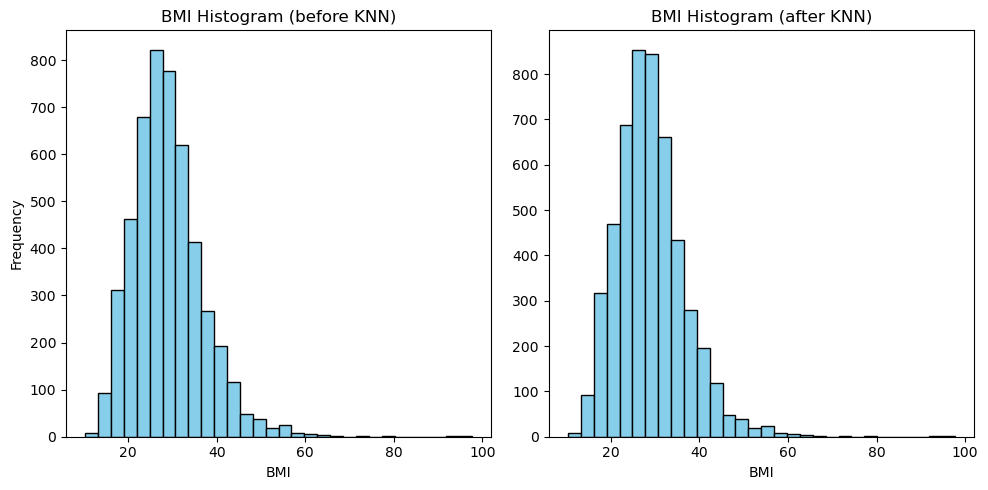

In [113]:
# Side by side histogram before and after imputation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['bmi'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('BMI Histogram (before KNN)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(df2['bmi'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('BMI Histogram (after KNN)')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

Distributions still look the same, which is good. Let's check the box plots. 

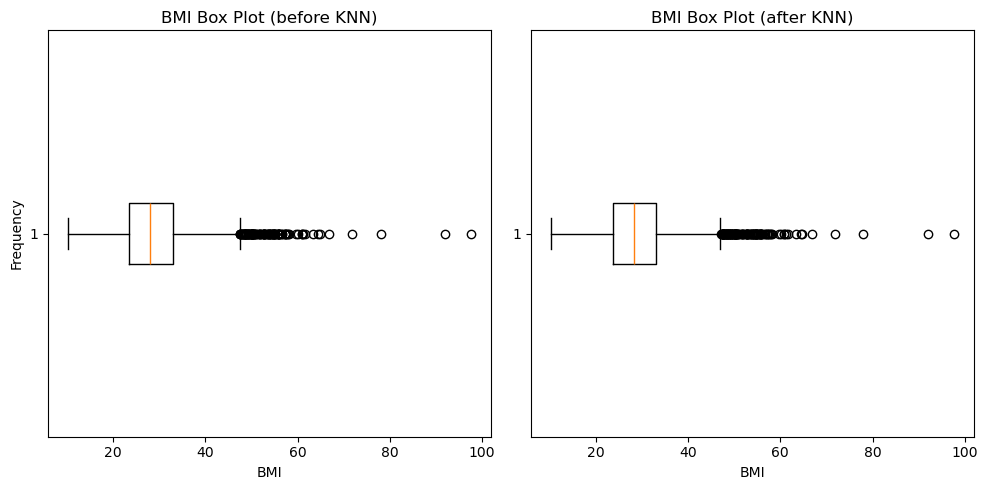

In [116]:
# Side by side box plots before and after imputation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['bmi'].dropna(), vert=False)
plt.title('BMI Box Plot (before KNN)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.boxplot(df2['bmi'].dropna(), vert=False)
plt.title('BMI Box Plot (after KNN)')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

In [118]:
# Descriptive stats before and after imputation
print('Before KNN:\n')
print(df['bmi'].describe())
print('After KNN:\n')
print(df2['bmi'].describe())

Before KNN:

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64
After KNN:

count    5110.000000
mean       28.943487
std         7.765511
min        10.300000
25%        23.700000
50%        28.200000
75%        33.000000
max        97.600000
Name: bmi, dtype: float64


We have some slight changes in these descriptive statistics, but not drastically enough to raise concern. All of these outputs suggest the use of KNN as the imputation method was appropriate and did not ruin the trends of the original data. Let's see if there are any outliers in this dataset. 

In [121]:
# Get all outliers in dataset
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
outliers = {}

for col in numeric_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)][col]
    if not outlier_values.empty:
        outliers[col] = outlier_values
        
for col, values in outliers.items():
    print(f"\nOutliers in '{col}':")
    print(values)


Outliers in 'hypertension':
4       1
6       1
10      1
15      1
17      1
       ..
5088    1
5091    1
5093    1
5100    1
5105    1
Name: hypertension, Length: 498, dtype: int64

Outliers in 'heart_disease':
0       1
2       1
6       1
11      1
13      1
       ..
4855    1
4869    1
4921    1
4986    1
5008    1
Name: heart_disease, Length: 276, dtype: int64

Outliers in 'avg_glucose_level':
0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5061    223.78
5062    211.58
5063    179.38
5064    193.88
5076    174.37
Name: avg_glucose_level, Length: 627, dtype: float64

Outliers in 'bmi':
21      48.9
66      47.5
113     56.6
254     50.1
258     54.6
        ... 
4858    47.6
4906    54.1
4952    56.6
5009    49.5
5057    47.6
Name: bmi, Length: 118, dtype: float64

Outliers in 'stroke':
0      1
1      1
2      1
3      1
4      1
      ..
244    1
245    1
246    1
247    1
248    1
Name: stroke, Length: 249, dtype: int64


There are a lot of outliers in the numerical features of this dataset. However, since we are dealing with medical data, these outliers may just represent valid, extreme cases. So, I do not want to completely remove them from the dataset. Probably should've removed `stroke`, `hypertension` and `heart_disease` from the columns to check for outliers because they are categorical - not numerical. Let's move onto variable encoding. We have a bunch of categorical variables that are currently represented by string values. These need to be converted to integers for our models to function properly later on. I'll be sure to explicitly output the mappings of each variable so we know what they represent.

In [126]:
# Encoding of gender variable
df2['gender'] = df2['gender'].map({'Male': 0, 'Female': 1})
print(df2.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046     0.0  67.0             0              1          Yes   
1  51676     1.0  61.0             0              0          Yes   
2  31112     0.0  80.0             0              1          Yes   
3  60182     1.0  49.0             0              0          Yes   
4   1665     1.0  79.0             1              0          Yes   

       work_type residence_type  avg_glucose_level    bmi   smoking_status  \
0        Private          Urban             228.69  36.60  formerly smoked   
1  Self-employed          Rural             202.21  31.38     never smoked   
2        Private          Rural             105.92  32.50     never smoked   
3        Private          Urban             171.23  34.40           smokes   
4  Self-employed          Rural             174.12  24.00     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


Male = 0 and Female = 1

In [134]:
# Encoding of work_type variable
df2 = pd.get_dummies(df2, columns=['work_type'])

In [136]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,0.0,67.0,0,1,Yes,Urban,228.69,36.60,formerly smoked,1,False,False,True,False,False
1,51676,1.0,61.0,0,0,Yes,Rural,202.21,31.38,never smoked,1,False,False,False,True,False
2,31112,0.0,80.0,0,1,Yes,Rural,105.92,32.50,never smoked,1,False,False,True,False,False
3,60182,1.0,49.0,0,0,Yes,Urban,171.23,34.40,smokes,1,False,False,True,False,False
4,1665,1.0,79.0,1,0,Yes,Rural,174.12,24.00,never smoked,1,False,False,False,True,False


Since there is no order for the possible values of the `work_type` variable, I did one hot encoding. Now, we have replace the original `work_type` feature with different boolean columns for each possible value.

In [139]:
# Encoding of residence_type variable
df2 = pd.get_dummies(df2, columns=['residence_type'])

In [141]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban
0,9046,0.0,67.0,0,1,Yes,228.69,36.60,formerly smoked,1,False,False,True,False,False,False,True
1,51676,1.0,61.0,0,0,Yes,202.21,31.38,never smoked,1,False,False,False,True,False,True,False
2,31112,0.0,80.0,0,1,Yes,105.92,32.50,never smoked,1,False,False,True,False,False,True,False
3,60182,1.0,49.0,0,0,Yes,171.23,34.40,smokes,1,False,False,True,False,False,False,True
4,1665,1.0,79.0,1,0,Yes,174.12,24.00,never smoked,1,False,False,False,True,False,True,False


Same thing goes for `residence_type` feature.

In [144]:
# Encoding of smoking_status variable
df2 = pd.get_dummies(df2, columns=['smoking_status'])

In [148]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.0,67.0,0,1,Yes,228.69,36.60,1,False,False,True,False,False,False,True,False,True,False,False
1,51676,1.0,61.0,0,0,Yes,202.21,31.38,1,False,False,False,True,False,True,False,False,False,True,False
2,31112,0.0,80.0,0,1,Yes,105.92,32.50,1,False,False,True,False,False,True,False,False,False,True,False
3,60182,1.0,49.0,0,0,Yes,171.23,34.40,1,False,False,True,False,False,False,True,False,False,False,True
4,1665,1.0,79.0,1,0,Yes,174.12,24.00,1,False,False,False,True,False,True,False,False,False,True,False


Same thing goes for `smoking_status` feature. Last feature to encode is `ever_married`, which is just a boolean. We'll do the same process as what we did for the `gender` column.

In [154]:
# Encoding of ever_married variable
df2['ever_married'] = df2['ever_married'].map({'No': 0, 'Yes': 1})

In [156]:
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.0,67.0,0,1,1,228.69,36.60,1,False,False,True,False,False,False,True,False,True,False,False
1,51676,1.0,61.0,0,0,1,202.21,31.38,1,False,False,False,True,False,True,False,False,False,True,False
2,31112,0.0,80.0,0,1,1,105.92,32.50,1,False,False,True,False,False,True,False,False,False,True,False
3,60182,1.0,49.0,0,0,1,171.23,34.40,1,False,False,True,False,False,False,True,False,False,False,True
4,1665,1.0,79.0,1,0,1,174.12,24.00,1,False,False,False,True,False,True,False,False,False,True,False


Missing values and outliers have been addressed. Variables have been encoded where necessary. We can still do some feature engineering and normalization/standardization, but that would depend on which models we want to build. So, I am going to leave this here and export this df2, just to have a 'checkpoint' of data.

In [160]:
df2.to_csv('preprocessed_stroke_data.csv', index=False)